In [ ]:

!pip install jax==0.4.6


In [ ]:

try:
    import pyopenjtalk
except ModuleNotFoundError:
    !pip install pyopenjtalk==0.2.0


<a href="https://colab.research.google.com/github/Ritori2022/Ritori2022.github.io/blob/main/%E2%80%9C%E7%BB%93%E2%80%9D%E8%AF%AD%E9%9F%B3%E5%90%88%E6%88%90%E6%A8%A1%E5%9E%8B%E2%80%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

使用Tacotron2制作
Made by Ranpeng

In [ ]:
#@title 安装依赖
!pip install -U tensorflow
!pip install -q unidecode tensorboardX
!pip install librosa==0.8.0
!pip install pysoundfile==0.9.0.post1
!pip install unidecode==1.3.4
!pip install pyopenjtalk==0.2.0
!pip install inflect==5.6.2
!pip install janome==0.4.2
!pip install tqdm -q
!pip install gdown
!pip install -q librosa unidecode


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.2/439.2 KB 26.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 75.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 63.5 MB/s eta 0:00:00
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully uninstalled flatbuffers-1.12
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: tensorboard
    Found existing i

# 下载模型

In [ ]:
!wget "https://drive.google.com/uc?id=1gkFfA6tRXXyqwrurXzCssSLqFv9Dl1vw&confirm=t&uuid=fa7ac425-5c9c-4b94-8752-c1010f965d12" -O Yui_TrapGenesis

--2023-01-23 14:02:56--  https://drive.google.com/uc?id=1gkFfA6tRXXyqwrurXzCssSLqFv9Dl1vw&confirm=t&uuid=fa7ac425-5c9c-4b94-8752-c1010f965d12
Resolving drive.google.com (drive.google.com)... 142.251.12.100, 142.251.12.113, 142.251.12.139, ...
Connecting to drive.google.com (drive.google.com)|142.251.12.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0c-7s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/155o6nmi30333e3an6nnfkurkjoq0c0m/1674482550000/10234491723368209638/*/1gkFfA6tRXXyqwrurXzCssSLqFv9Dl1vw?uuid=fa7ac425-5c9c-4b94-8752-c1010f965d12 [following]
--2023-01-23 14:02:56--  https://doc-0c-7s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/155o6nmi30333e3an6nnfkurkjoq0c0m/1674482550000/10234491723368209638/*/1gkFfA6tRXXyqwrurXzCssSLqFv9Dl1vw?uuid=fa7ac425-5c9c-4b94-8752-c1010f965d12
Resolving doc-0c-7s-docs.googleusercontent.com (doc-0c-7s-docs.googleusercontent.com)... 142.250

# 配置并运行

Current Config:
pronounciation_dictionary: False
show_graphs: True
max_duration (in seconds): 25
stop_threshold: 0.25


输入要转换成语音的文本.
--------------------------------------------------
国内サーバーのハースストーンは今夜閉鎖されます


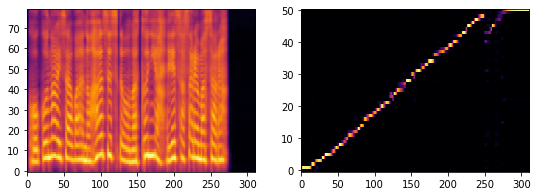

--------------------------------------------------
国内サーバーのハースストーンは今夜閉鎖されます


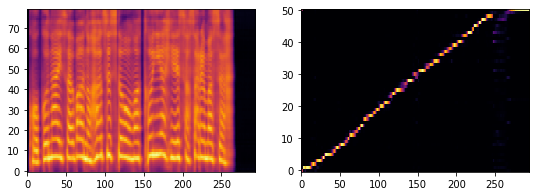

--------------------------------------------------
国内サーバーのハースストーンは`今夜閉鎖されます


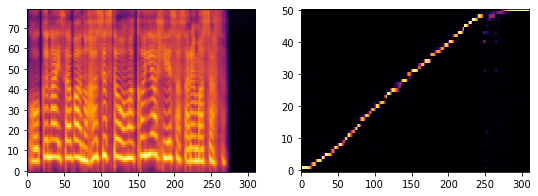

--------------------------------------------------
国内サーバーのハースストーンは今夜閉鎖されます


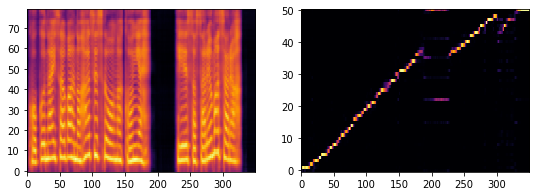

--------------------------------------------------
国内サーバーのハースストーンは。今夜閉鎖されます


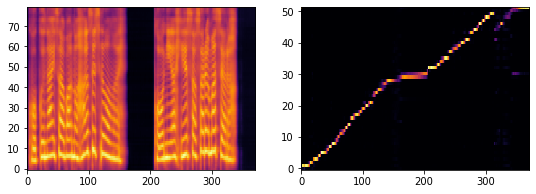

--------------------------------------------------


In [ ]:
#@，tlitle 配置并运行

#国际 HiFi-GAN 模型(有点机器音): 1qpgI41wNXFcH-iKq1Y42JlBC9j0je8PW
#@markdown 你训练好的tacotron2模型的路径填在`Tacotron2_Model`这里
Tacotron2_Model = '/content/Yui_TrapGenesis'#@param {type:"string"}
TACOTRON2_ID = Tacotron2_Model
HIFIGAN_ID = "1qpgI41wNXFcH-iKq1Y42JlBC9j0je8PW"
#@markdown 选择预处理文本的cleaner
text_cleaner = 'japanese_phrase_cleaners'#@param {type:"string"}

# Check if initialized
try:
    initialized
except NameError:
    print("Setting up, please wait.\n")

    from tqdm.notebook import tqdm
    with tqdm(total=5, leave=False) as pbar:
        import os
        from os.path import exists, join, basename, splitext
        git_repo_url = 'https://github.com/CjangCjengh/tacotron2-japanese.git'
        project_name = splitext(basename(git_repo_url))[0]
        if not exists(project_name):
            # clone and install
            !git clone -q --recursive {git_repo_url}
            !git clone -q --recursive https://github.com/SortAnon/hifi-gan

        pbar.update(1) # downloaded TT2 and HiFi-GAN
        import sys
        sys.path.append('hifi-gan')
        sys.path.append(project_name)
        import time
        import matplotlib
        import matplotlib.pylab as plt
        import gdown
        d = 'https://drive.google.com/uc?id='

        %matplotlib inline
        import IPython.display as ipd
        import numpy as np
        import torch
        import json
        from hparams import create_hparams
        from model import Tacotron2
        from layers import TacotronSTFT
        from audio_processing import griffin_lim
        from text import text_to_sequence
        from env import AttrDict
        from meldataset import MAX_WAV_VALUE
        from models import Generator

        pbar.update(1) # initialized Dependancies

        graph_width = 900
        graph_height = 360
        def plot_data(data, figsize=(int(graph_width/100), int(graph_height/100))):
            %matplotlib inline
            fig, axes = plt.subplots(1, len(data), figsize=figsize)
            for i in range(len(data)):
                axes[i].imshow(data[i], aspect='auto', origin='bottom',
                            interpolation='none', cmap='inferno')
            fig.canvas.draw()
            plt.show()

        # Setup Pronounciation Dictionary
        !wget https://github.com/wind4000/tacotron2/releases/download/v0.2/merged.dict.txt
        thisdict = {}
        for line in reversed((open('merged.dict.txt', "r").read()).splitlines()):
            thisdict[(line.split(" ",1))[0]] = (line.split(" ",1))[1].strip()

        pbar.update(1) # Downloaded and Set up Pronounciation Dictionary

        def ARPA(text, punctuation=r"!?,.;", EOS_Token=True):
            out = ''
            for word_ in text.split(" "):
                word=word_; end_chars = ''
                while any(elem in word for elem in punctuation) and len(word) > 1:
                    if word[-1] in punctuation: end_chars = word[-1] + end_chars; word = word[:-1]
                    else: break
                try:
                    word_arpa = thisdict[word.upper()]
                    word = "{" + str(word_arpa) + "}"
                except KeyError: pass
                out = (out + " " + word + end_chars).strip()
            if EOS_Token and out[-1] != ";": out += ";"
            return out

        def get_hifigan(MODEL_ID):
            # Download HiFi-GAN
            hifigan_pretrained_model = 'hifimodel'
            gdown.download(d+MODEL_ID, hifigan_pretrained_model, quiet=False)
            if not exists(hifigan_pretrained_model):
                raise Exception("HiFI-GAN model failed to download!")

            # Load HiFi-GAN
            conf = os.path.join("hifi-gan", "config_v1.json")
            with open(conf) as f:
                json_config = json.loads(f.read())
            h = AttrDict(json_config)
            torch.manual_seed(h.seed)
            hifigan = Generator(h).to(torch.device("cuda"))
            state_dict_g = torch.load(hifigan_pretrained_model, map_location=torch.device("cuda"))
            hifigan.load_state_dict(state_dict_g["generator"])
            hifigan.eval()
            hifigan.remove_weight_norm()
            return hifigan, h

        hifigan, h = get_hifigan(HIFIGAN_ID)
        pbar.update(1) # Downloaded and Set up HiFi-GAN

        def has_MMI(STATE_DICT):
            return any(True for x in STATE_DICT.keys() if "mi." in x)

        def get_Tactron2(MODEL_ID):
            # Download Tacotron2
            tacotron2_pretrained_model = TACOTRON2_ID
            if not exists(tacotron2_pretrained_model):
                raise Exception("Tacotron2 model failed to download!")
            # Load Tacotron2 and Config
            hparams = create_hparams()
            hparams.sampling_rate = 22050
            hparams.max_decoder_steps = 3000 # Max Duration
            hparams.gate_threshold = 0.25 # Model must be 25% sure the clip is over before ending generation
            model = Tacotron2(hparams)
            state_dict = torch.load(tacotron2_pretrained_model)['state_dict']
            if has_MMI(state_dict):
                raise Exception("ERROR: This notebook does not currently support MMI models.")
            model.load_state_dict(state_dict)
            _ = model.cuda().eval().half()
            return model, hparams

        model, hparams = get_Tactron2(TACOTRON2_ID)
        previous_tt2_id = TACOTRON2_ID

        pbar.update(1) # Downloaded and Set up Tacotron2

        # Extra Info
        def end_to_end_infer(text, pronounciation_dictionary, show_graphs):
            for i in [x for x in text.split("\n") if len(x)]:
                if not pronounciation_dictionary:
                    if i[-1] != ";": i=i+";"
                else: i = ARPA(i)
                with torch.no_grad(): # save VRAM by not including gradients
                    sequence = np.array(text_to_sequence(i, [text_cleaner]))[None, :]
                    sequence = torch.autograd.Variable(torch.from_numpy(sequence)).cuda().long()
                    mel_outputs, mel_outputs_postnet, _, alignments = model.inference(sequence)
                    if show_graphs:
                        plot_data((mel_outputs_postnet.float().data.cpu().numpy()[0],
                                alignments.float().data.cpu().numpy()[0].T))
                    y_g_hat = hifigan(mel_outputs_postnet.float())
                    audio = y_g_hat.squeeze()
                    audio = audio * MAX_WAV_VALUE
                    print("")
                    ipd.display(ipd.Audio(audio.cpu().numpy().astype("int16"), rate=hparams.sampling_rate))
    from IPython.display import clear_output
    clear_output()
    initialized = "Ready"

if previous_tt2_id != TACOTRON2_ID:
    print("Updating Models")
    model, hparams = get_Tactron2(TACOTRON2_ID)
    hifigan, h = get_hifigan(HIFIGAN_ID)
    previous_tt2_id = TACOTRON2_ID

pronounciation_dictionary = False #@param {type:"boolean"}
# disables automatic ARPAbet conversion, useful for inputting your own ARPAbet pronounciations or just for testing
show_graphs = True #@param {type:"boolean"}
max_duration = 25 #this does nothing
model.decoder.max_decoder_steps = 3000 #@param {type:"integer"}
stop_threshold = 0.25 #@param {type:"number"}
model.decoder.gate_threshold = stop_threshold

#@markdown ---

print(f"Current Config:\npronounciation_dictionary: {pronounciation_dictionary}\nshow_graphs: {show_graphs}\nmax_duration (in seconds): {max_duration}\nstop_threshold: {stop_threshold}\n\n")

time.sleep(1)
print("输入要转换成语音的文本.")
contents = []
while True:
    try:
        print("-"*50)
        line = input()
        if line == "":
            continue
        end_to_end_infer(line, pronounciation_dictionary, show_graphs)
    except EOFError:
        break
    except KeyboardInterrupt:
        print("程序终止...")
        break

In [ ]:

# Import the required libraries
import gradio as gr
import numpy as np

# Define the function for the Gradio interface
def synthesize_speech(text):
    # Copy the model loading and inference code here
    # Note: The actual model loading and inference code should replace this placeholder
    model_output = 'This is a placeholder.'
    return model_output

# Create the Gradio interface
iface = gr.Interface(
    fn=synthesize_speech,  # the function to wrap
    inputs='text',  # the input type
    outputs='text',  # the output type
)

# Launch the interface
iface.launch(share=True)
